##**Assignment 2**

Import semua module dan packages yang diperlukan

In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

Import dataset : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Cek berapa banyak baris dan kolom yang dimiliki.

In [3]:
df.shape

(84548, 22)

## Data Cleaning

Drop atau hapus kolom yang tidak dibutuhkan.

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

Cek type data dari setiap kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

## Mengelompokkan kolom sesuai dengan klasifikasinya.

In [6]:
# Identifikasi kolom object
print(df.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [7]:
# Identifikasi kolom integer
print(df.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [8]:
# Convert beberapa object ke variabel category
obj_cats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']

In [9]:
# Convert beberapa int ke variabel category
num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
            'TAX CLASS AT TIME OF SALE']

for colname in num_cats:
  df[colname] = df[colname].astype('category')

In [10]:
# cek type seluruh kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  object  
 2   BUILDING CLASS CATEGORY         84548 non-null  object  
 3   TAX CLASS AT PRESENT            84548 non-null  object  
 4   BLOCK                           84548 non-null  category
 5   LOT                             84548 non-null  category
 6   EASE-MENT                       84548 non-null  object  
 7   BUILDING CLASS AT PRESENT       84548 non-null  object  
 8   ADDRESS                         84548 non-null  object  
 9   APARTMENT NUMBER                84548 non-null  object  
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

## Convert type data object ke int dg pd.to_numeric, dan set errors to 'coerce'

In [11]:
num = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']

for col in num: #coerce for missing values
  df[col] = pd.to_numeric(df[col], errors='coerce')

## Convert SALE DATE to date object

In [12]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [13]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,...,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,...,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,...,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


Rename nama kolom dan tambah _ agar memudahkan processing

In [14]:
df.columns = df.columns.str.replace(' ', '_')

Ubah nama kolom menjadi lowercase agar lebih efisien.

In [15]:
df.columns = df.columns.str.lower()
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

Buat kolom baru yang dibutuhkan

In [16]:
# buat kolom age yang menunjukkan umur properti
df['age'] = 2023 - df['year_built']

# kelompokkan properti berdasarkan umurnya, pre atau post war
df['age_category'] = np.where(df['age']>=76, 'Pre-War', 'Post-War')

# convert kolom dalam type category
df['age_category'] = df['age_category'].astype('category')

df.head(10)

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123,Pre-War
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,123,Pre-War
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,123,Pre-War
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110,Pre-War
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123,Pre-War
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,...,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20,123,Pre-War
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,103,Pre-War
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,...,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20,123,Pre-War
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,...,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20,103,Pre-War
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,103,Pre-War


In [17]:
# menambah kolom sale_price_in_m
df['sale_price_in_m'] = df['sale_price'].astype(np.float64) / 1000000

In [18]:
# set numerical indicator kolom borough astype str kemudian replace sesuai nama borough
df['borough'] = df['borough'].astype(str)
df['borough'] = df['borough'].str.replace("1", "Manhattan")
df['borough'] = df['borough'].str.replace("2", "Bronx")
df['borough'] = df['borough'].str.replace("3", "Brooklyn")
df['borough'] = df['borough'].str.replace("4", "Queens")
df['borough'] = df['borough'].str.replace("5", "Staten Island")

## Missing Values

In [19]:
# hitung missing values
df.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
age_category                          0
sale_price_in_m                   14561
dtype: int64

In [20]:
# remove missing values
df = df.dropna()

In [21]:
# cek kembali jumlah missing values
df.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
age_category                      0
sale_price_in_m                   0
dtype: int64

Terdapat beberapa nilai minimum sebesar 0 di beberapa kolom yang tidak masuk akal. Contohnya pada kolom year_built terdapat nilai minimum 0.

In [22]:
# Cek df kolom year_built dengan nilai 0 tahun
df[df['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category,sale_price_in_m
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,,...,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2023,Pre-War,2.500000
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,,...,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2023,Pre-War,1.200000
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,,Z9,1816 WEBSTER AVENUE,,...,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2023,Pre-War,0.300000
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,,V0,1475 HICKS STREET,,...,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2023,Pre-War,0.098000
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,,V0,3552 EASTCHESTER ROAD,,...,3400.0,0.0,0,1,V0,0.0,2017-03-16,2023,Pre-War,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,,C1,112-48 38TH AVENUE,,...,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2023,Pre-War,2.153222
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,,Z9,5506 VAN CLEEF STREET,,...,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2023,Pre-War,0.113000
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,,D3,142-11 CHERRY AVENUE,,...,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2023,Pre-War,4.000000
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,,A3,45-39 BROWVALE LANE,,...,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2023,Pre-War,1.731025


In [23]:
# Cek berapa banyak year_built= 0
zero = df[df['year_built']==0]
zero.count()

borough                           2911
neighborhood                      2911
building_class_category           2911
tax_class_at_present              2911
block                             2911
lot                               2911
ease-ment                         2911
building_class_at_present         2911
address                           2911
apartment_number                  2911
zip_code                          2911
residential_units                 2911
commercial_units                  2911
total_units                       2911
land_square_feet                  2911
gross_square_feet                 2911
year_built                        2911
tax_class_at_time_of_sale         2911
building_class_at_time_of_sale    2911
sale_price                        2911
sale_date                         2911
age                               2911
age_category                      2911
sale_price_in_m                   2911
dtype: int64

In [24]:
# hapus baris dengan year_built = 0
df = df[df['year_built']!=0]

## Outlier

Sama seperti cara sebelumnya kita akan memeriksa nilai dimana kolom where land and gross square feet bernilai 0.

In [25]:
df[df['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category,sale_price_in_m
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88,Pre-War,0.0400
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88,Pre-War,0.0400
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0.0,0.0,1941,2,D4,60000.0,2016-12-01,82,Pre-War,0.0600
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,0.0,0.0,2008,1,R3,310000.0,2017-02-28,15,Post-War,0.3100
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,0.0,0.0,2008,1,R3,342500.0,2017-07-31,15,Post-War,0.3425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0.0,0.0,1990,4,RP,0.0,2017-07-25,33,Post-War,0.0000
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0.0,0.0,1990,4,RP,0.0,2017-07-17,33,Post-War,0.0000
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0.0,0.0,2006,4,RS,0.0,2016-10-06,17,Post-War,0.0000
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0.0,0.0,2006,4,RS,0.0,2016-10-24,17,Post-War,0.0000


Berdasarkan definisi variabel yang dicantumkan, land square feet adalah luas tanah yang tercantum dalam meter persegi. Berdasarkan definisi tersebut, tidak mungkin sebuah properti memiliki luas tanah sebesar 0 meter persegi.

In [26]:
df[df['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category,sale_price_in_m
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88,Pre-War,0.0400
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88,Pre-War,0.0400
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0.0,0.0,1941,2,D4,60000.0,2016-12-01,82,Pre-War,0.0600
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,0.0,0.0,2008,1,R3,310000.0,2017-02-28,15,Post-War,0.3100
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,0.0,0.0,2008,1,R3,342500.0,2017-07-31,15,Post-War,0.3425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0.0,0.0,1990,4,RP,0.0,2017-07-25,33,Post-War,0.0000
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0.0,0.0,1990,4,RP,0.0,2017-07-17,33,Post-War,0.0000
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0.0,0.0,2006,4,RS,0.0,2016-10-06,17,Post-War,0.0000
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0.0,0.0,2006,4,RS,0.0,2016-10-24,17,Post-War,0.0000


Gross square feet didefinisikan sebagai luas total seluruh lantai yang diukur dari permukaan luar dinding, luar bangunan termasuk luas tanah dan ruang di setiap bangunan atau struktur apapun di properti. Sama seperti sebelumnya tidak mungkin jika gross square feet memiliki nilai sebesar 0, dan seharusnya dihapus.

In [27]:
# Hapus outliers dari kolom land square feet dan gross square feet.
df = df[df['land_square_feet']!=0]
df = df[df['gross_square_feet']!=0]

##**Measure of Central Tendency**

**Mean**

Kita akan mecoba mencari mean harga jual properti dalam juta dolar di New York (kolom sale_price_in_m).

In [28]:
# slice kolom sale_price dan simpan dalam variabel baru
x = df['sale_price_in_m']
x

0         6.625000
3         3.936272
4         8.000000
6         3.192840
9        16.232000
           ...    
84543     0.450000
84544     0.550000
84545     0.460000
84546    11.693337
84547     0.069300
Name: sale_price_in_m, Length: 36805, dtype: float64

In [29]:
# Mean dengan NumPy
mean_ = np.mean(x)
mean_

1.3058409831001223

In [30]:
# Mean dengan pd.Series
mean_ = x.mean()
mean_

1.3058409831001223

In [31]:
# Mean dengan Scipy
mean_ = scipy.mean(x)
mean_

<ipython-input-31-30de06e87c8b>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_ = scipy.mean(x)


1.3058409831001223

Kita akan mencoba mencari tahu rata-rata harga jual properti dari masing-masing wilayah.

Text(0.5, 1.0, 'Average Selling Price in Each Borough')

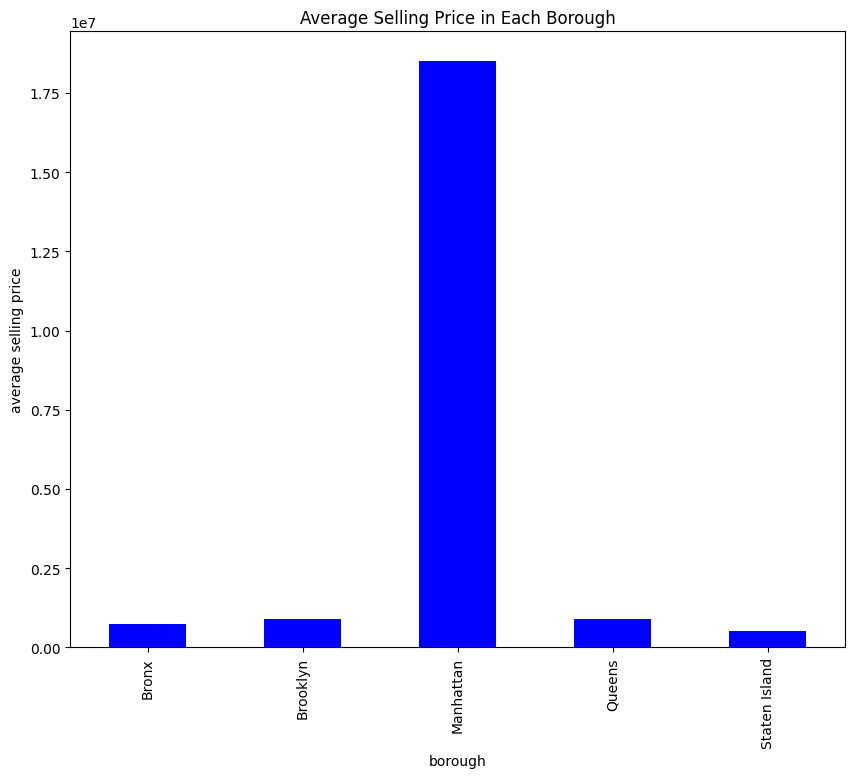

In [32]:
# Slice kolom sale_price dan groupby borough .mean()
mean_bor = df['sale_price'].groupby(df['borough']).mean()

# Visualisasikan dalam bentuk bar plot agar lebih mudah dipahami
mean_bor.plot(kind='bar',
              figsize=(10, 8),
              color='blue')
plt.xlabel('borough')
plt.ylabel('average selling price')
plt.title('Average Selling Price in Each Borough')

Berdasarkan hasil visualisasi dengan bar plot, dapat disimpulkan bahwa dengan harga jual rata-rata properti di wilayah Manhattan jauh lebih tinggi dibandingkan dengan wilayah lainnya.

**Median**

Kita akan mencoba mencari nilai tengah dari umur properti (kolom age).

In [33]:
# buat series yang berisi kolom age
age_ = df['age']
age_

0        123
3        110
4        123
6        103
9        103
        ... 
84543     25
84544     25
84545     98
84546     22
84547     17
Name: age, Length: 36805, dtype: int64

In [34]:
# Median dengan NumPy
median_ = np.median(age_)
median_

93.0

In [35]:
# Median dengan pd.Series
median_ = age_.median()
median_

93.0

In [36]:
# Median dengan Scipy
median_ = scipy.median(age_)
median_

<ipython-input-36-d4e5550c3dfe>:2: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  median_ = scipy.median(age_)


93.0

Kita akan mencoba memvisualisasikan median kolom age dari masing-masing wilayah

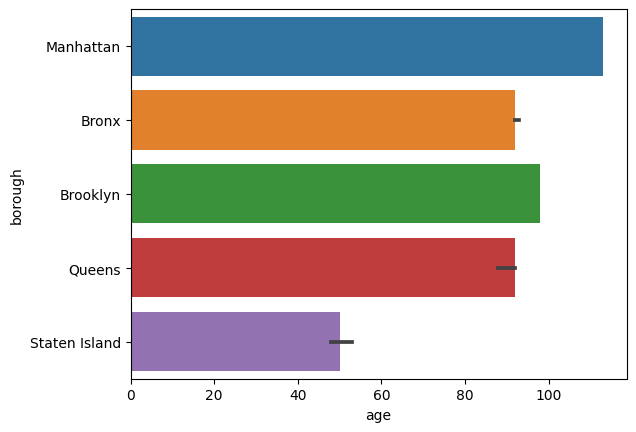

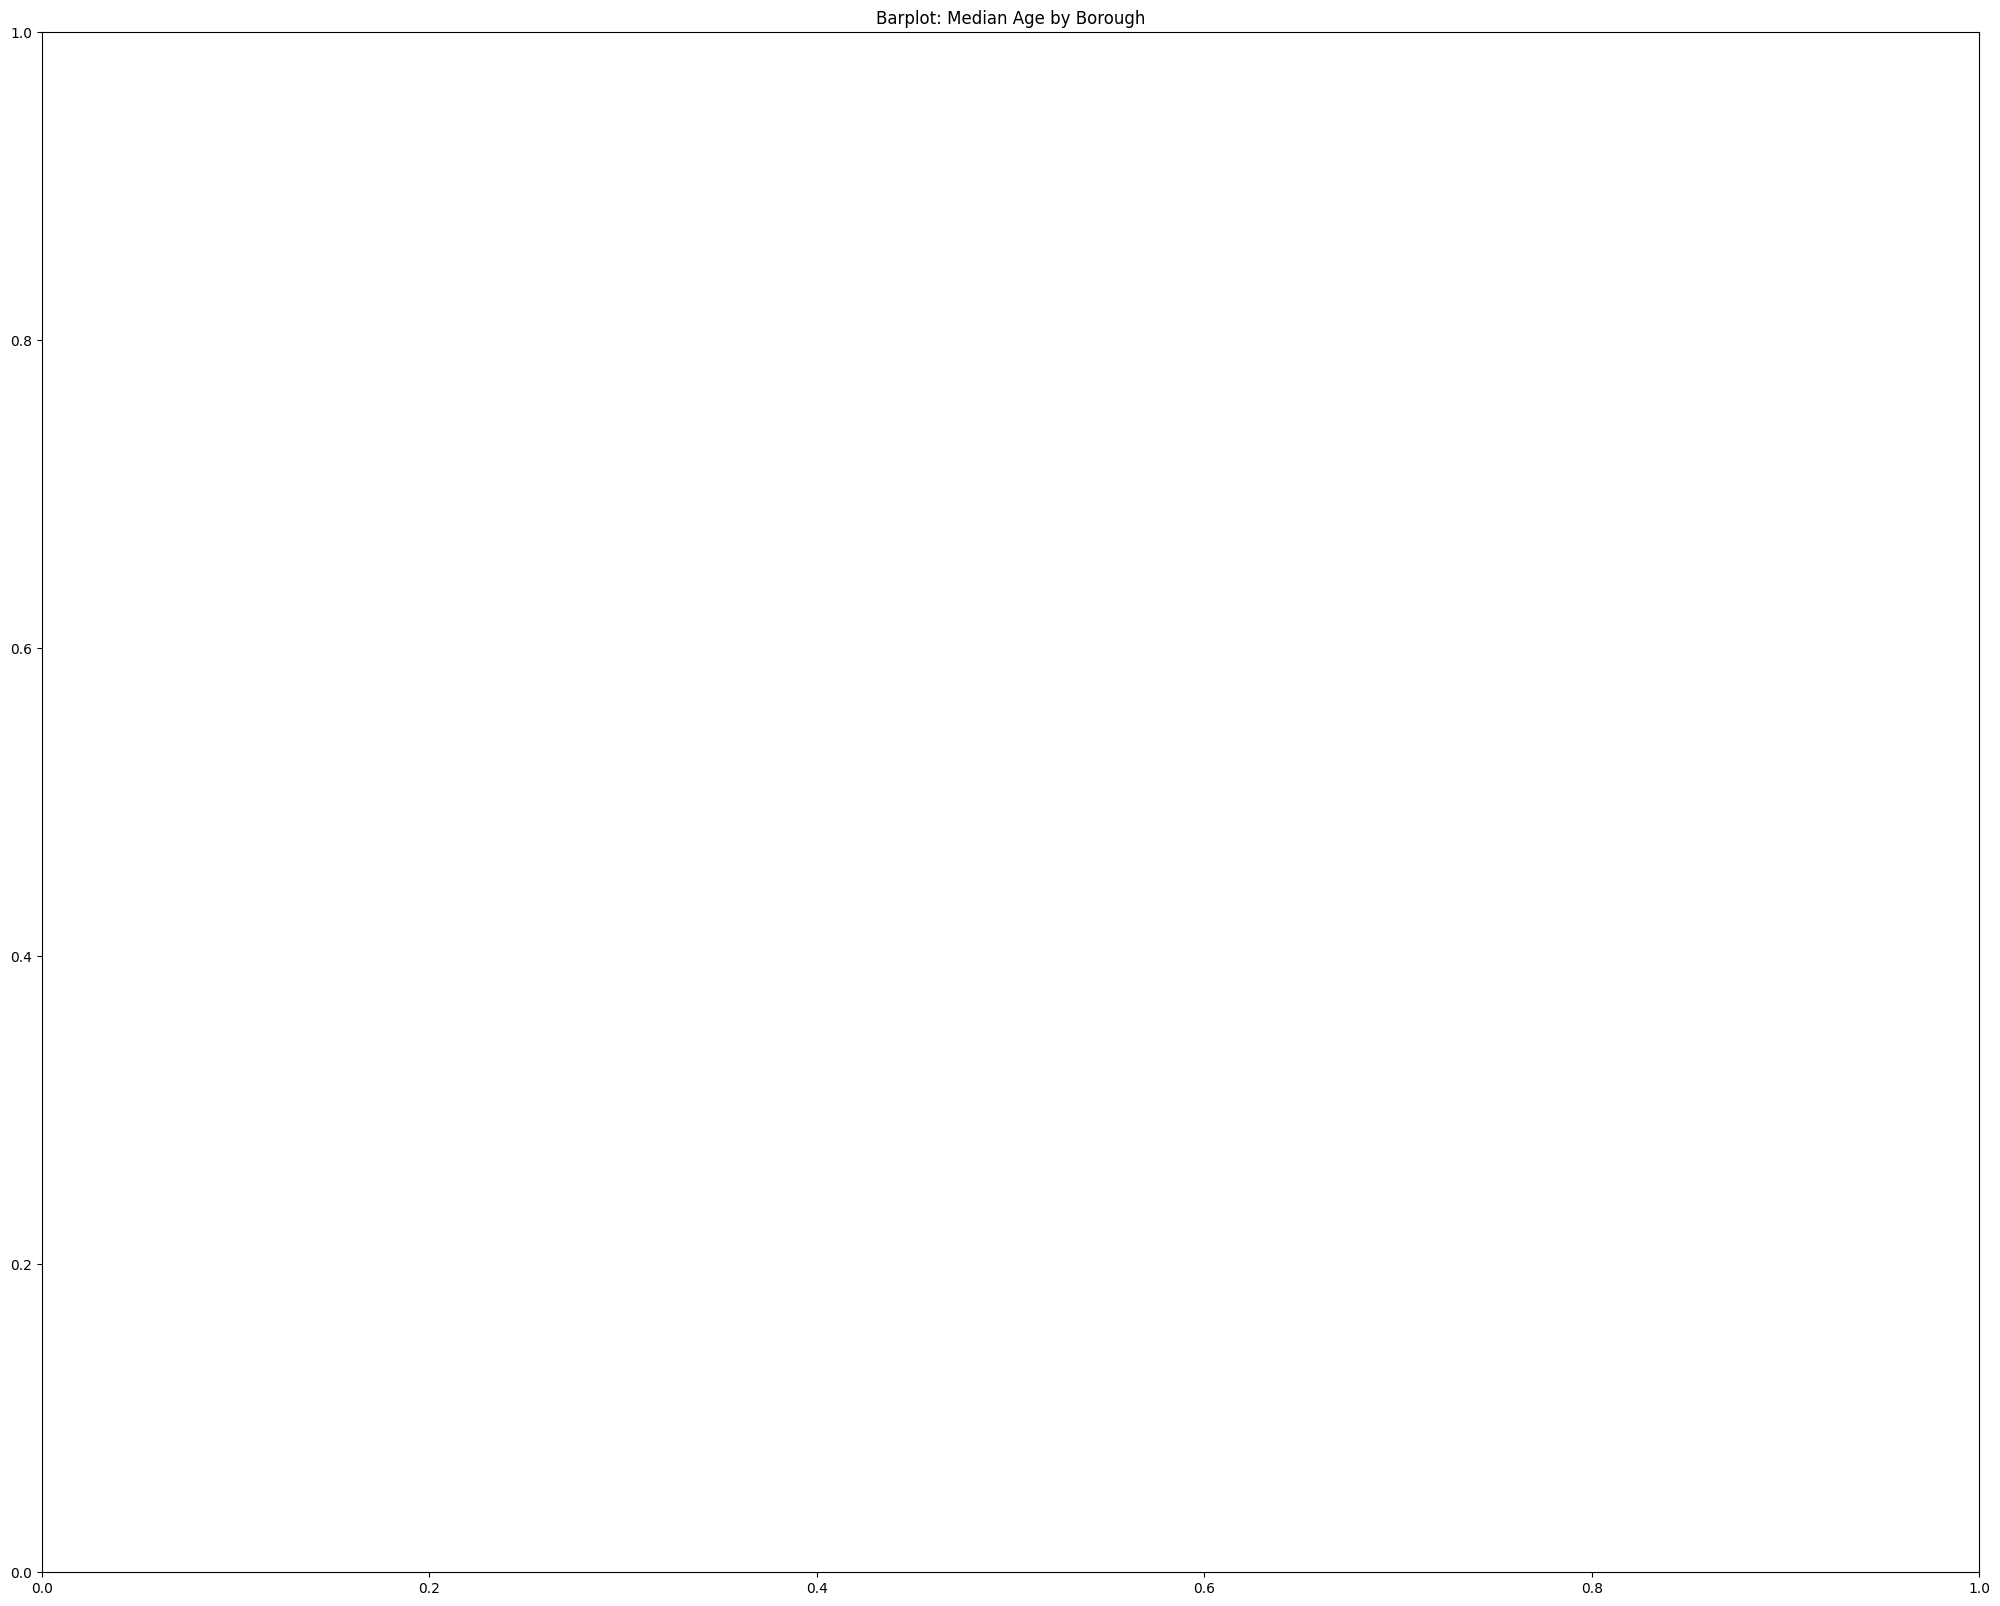

In [37]:
sns.barplot(data=df, x='age', y='borough', estimator=np.median)
plt.subplots(figsize=(25, 20))
plt.title('Barplot: Median Age by Borough')
plt.show()

Berdasarkan hasil visualisasi tersebut dapat disimpulkan bahwa properti di Manhattan memiliki nilai tengah yang tinggi dibandingkan wilayah lain, sedangkan staten island merupakan wilayah dengan median age terendah, dan kemungkinan properti di wilayah state island banyak dibangun setelah masa perang.

**Mode**

Kita akan mencoba mencari mode tahun properti di bangun (kolom year_built).

In [38]:
# buat series yang berisi kolom year built
years_built = df['year_built']
years_built

0        1900
3        1913
4        1900
6        1920
9        1920
         ... 
84543    1998
84544    1998
84545    1925
84546    2001
84547    2006
Name: year_built, Length: 36805, dtype: int64

In [39]:
# Mode dengan pd.Series
print(years_built.mode())

0    1920
Name: year_built, dtype: int64


In [40]:
# Mode dengan scipy
mode_ = scipy.stats.mode(years_built)
mode_

<ipython-input-40-ba0d94f21398>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(years_built)


ModeResult(mode=array([1920]), count=array([4281]))

In [41]:
# Mode dengan statistics
mode_ = statistics.mode(years_built)
mode_

1920

##**Measure of Spread**

**Range**

Kita akan mencoba mencari range data harga jual properti rumah (kolom sale_price_in_m) di wilayah Manhattan.

In [42]:
# Buat df baru berisi borough dan sale price in m
price_bor = df[['borough', 'sale_price_in_m']]
price_bor

,borough,sale_price_in_m
0,Manhattan,6.625000
3,Manhattan,3.936272
4,Manhattan,8.000000
6,Manhattan,3.192840
9,Manhattan,16.232000
...,...,...
84543,Staten Island,0.450000
84544,Staten Island,0.550000
84545,Staten Island,0.460000
84546,Staten Island,11.693337


In [43]:
# filter borough = Manhattan
price_man = price_bor.loc[price_bor['borough']=='Manhattan']
price_man

,borough,sale_price_in_m
0,Manhattan,6.625000
3,Manhattan,3.936272
4,Manhattan,8.000000
6,Manhattan,3.192840
9,Manhattan,16.232000
...,...,...
18040,Manhattan,11.925000
18041,Manhattan,32.000000
18042,Manhattan,40.100000
18044,Manhattan,5.650000


In [44]:
# ambil kolom sale price in m dan simpan series dalam variabel z
z = price_man['sale_price_in_m']
z

0         6.625000
3         3.936272
4         8.000000
6         3.192840
9        16.232000
           ...    
18040    11.925000
18041    32.000000
18042    40.100000
18044     5.650000
18300     2.000000
Name: sale_price_in_m, Length: 1006, dtype: float64

In [45]:
# Hitung range dengan pandas
range_ = z.max() - z.min()
range_

2209.999999

In [46]:
# range dengan NumPy
np.amax(z) - np.amin(z)

2209.999999

**Variance**

In [47]:
# Variance dengan NumPy
# kita akan menggunakan data x yaitu sale_price
var_ = np.var(x)
var_

230.59939773111736

In [48]:
# Variance dengan pd.Series
x.var()

230.60566333805497

**Standar Deviasi**

Masih dengan data yang sama kita akan mencari standar deviasi dari harga jual properti dalam juta dolar ( kolom sale_price_in_m)

In [49]:
# Std dengan NumPy
np.std(x)

15.185499587801429

In [50]:
# Std dengan pd.Series
x.std()

15.185705888698587

### **Probability Distribution**

Kita akan mecari distribusi probabilitas data harga jual properti dalam juta dolar (kolom sale_price_in_m) dengan menggunakan histogram

<ipython-input-51-db9e327adbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sale_price_in_m'], color='darkslategrey')


Text(0.5, 1.0, 'Distribution of Sale Price in M')

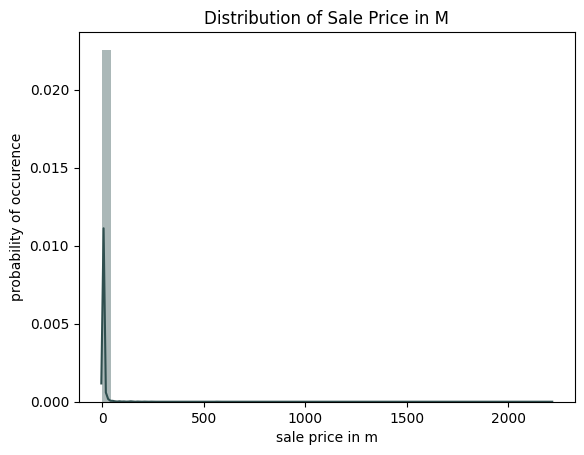

In [51]:
sns.distplot(df['sale_price_in_m'], color='darkslategrey')
plt.xlabel('sale price in m')
plt.ylabel('probability of occurence')
plt.title('Distribution of Sale Price in M')

Plot di atas menunjukkan hasil yang terlalu tinggi di kisaran angka 0 dan memanjang kesamping. Sehingga dalam hal ini akan dibuat batasan untuk data yang != 0 dan < 500 Juta Dolar.

In [52]:
# Df baru dengan nilai sale_price_in_m tdk sama dengan nol dan < 5 juta USD
df_new = df[(df['sale_price_in_m'] <5) & (df['sale_price_in_m']!=0)]
df_new.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category,sale_price_in_m
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110,Pre-War,3.936272
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,103,Pre-War,3.192840
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,,...,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,113,Pre-War,3.300000
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,,S5,183 AVENUE B,,...,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,113,Pre-War,4.750000
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,,K4,115 AVENUE C,,...,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,124,Pre-War,3.700000


<ipython-input-53-f6b85ab35441>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['sale_price_in_m'], color='darkslategrey')


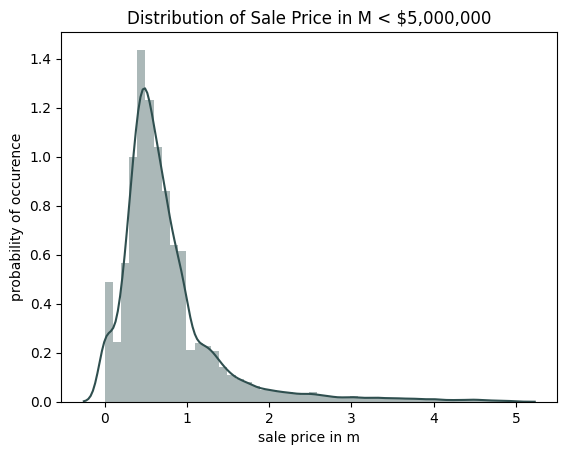

In [53]:
# Tampilkan distribusi probabilitas df_new dengan histogram
sns.distplot(df_new['sale_price_in_m'], color='darkslategrey')
plt.xlabel('sale price in m')
plt.ylabel('probability of occurence')
plt.title('Distribution of Sale Price in M < $5,000,000')
plt.show()

Berdasarkan hasil plot tersebut menunjukkan bahwa distribusi probabilitas dari data harga jual (dalam juta usd) tidak terdistribusi secara normal.

### **Confidence Interval**

Kita akan menggunakan kolom sale price in m dan kolom age_category.

In [54]:
# Kita buat df baru yang berisi sale price yang != 0 dan dengan age_category post_war
df_ci = df[['sale_price_in_m', 'age_category']]
df_ci

,sale_price_in_m,age_category
0,6.625000,Pre-War
3,3.936272,Pre-War
4,8.000000,Pre-War
6,3.192840,Pre-War
9,16.232000,Pre-War
...,...,...
84543,0.450000,Post-War
84544,0.550000,Post-War
84545,0.460000,Pre-War
84546,11.693337,Post-War


In [55]:
# Buang nilai 0 pada kolom sale_price_in_m
df_neww = df_ci[df_ci['sale_price_in_m']!=0]

In [56]:
# Group df_ci by age_category dan aggregatkan mean, standar deviasi, dan size.
df_neww.groupby('age_category').agg({'sale_price_in_m': [np.mean, np.std, np.size]})

sale_price_in_m                  
                        mean        std   size
age_category                                  
Post-War            1.778903  27.405780  10118
Pre-War             1.565675   6.740121  19201

In [57]:
mean_post_war = 1.778903
std = 27.405780
n = 10118
z = 1.96   #confidence level 95%

In [58]:
# standard error
se = std / np.sqrt(n)

In [59]:
# Construct the CI
lcb = mean_post_war - z* se #lower limit of CI
ucb = mean_post_war + z* se #upper limit of CI
lcb, ucb

(1.244891141922563, 2.312914858077437)

Hasil Confidence Interval adalah sebesar 1.24 Juta USD - 2.31 Juta USD.

### **Hypothesis**

In [60]:
import statsmodels.api as sm

Kita akan menguji apakah rata2 harga jual bangunan yang dibangun sebelum masa perang sama dengan rata-rata harga jual bangunan yang dibangun pasca perang.

H0 : µ1 = µ2

Ha : µ1 ≠ µ2




In [61]:
# Dari df sebelumya kita slice dan buat df pre_war dan post_war
pre_war = df_neww[df_neww['age_category']=='Pre-War']
post_war = df_neww[df_neww['age_category']=='Post-War']

In [62]:
# Definisikan n1, mu1, dan std1
n1 = len(pre_war)
mu1 = pre_war['sale_price_in_m'].mean()
std1 = pre_war['sale_price_in_m'].std()

(n1, mu1, std1)

(19201, 1.5656754406541324, 6.740121226950356)

In [63]:
# Definisikan n2, mu2, dan std2
n2 = len(post_war)
mu2 = post_war['sale_price_in_m'].mean()
std2 = post_war['sale_price_in_m'].std()

(n2, mu2, std2)

(10118, 1.77890326615932, 27.405779778661422)

In [64]:
sm.stats.ztest(pre_war['sale_price_in_m'],
              post_war['sale_price_in_m'],alternative='two-sided')

(-1.021113304873036, 0.3072007602164464)

Hasil p-value sebesar 0.30 > nilai alpha = 0.05 sehingga dalam hal ini H0 diterima artinya tidak cukup bukti untuk menyatakan bahwa rata-rata harga jual properti yang dibangun sebelum masa perang tidak sama dengan rata-rata harga jual properti yang dibangun setelah masa perang.